In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import matplotlib.cm as cm
import datetime

# Đọc dữ liệu

In [2]:
profile=pd.read_excel("DataSet.xlsx",sheet_name=1)
sale=pd.read_excel("DataSet.xlsx", sheet_name=2)

In [3]:
profile.head(2)

,KH_ID,GioiTinh,QueQuan,NamHocThu,DoTuoi,ChuyenNganh,NgheNghiepGiaDinh,ChiTieuHangThang,ThoiGianSuDung,MucDichSuDungLaptop,MucDoHaiLong,YeuToThuongHieuSP,YeuToCauHinh,YeuToTocDoXuLy,YeuToGia,YeuToThietKe,YeuToUyTinNhaBanle,YeuToBaoMat,YeuToBaoHanh,YeuToKhuyenMai
0,CTM10164,Nam,Quảng Trị,Năm 2,20,Luật kinh tế,Nông dân,Từ 1.500.000 đến 3.000.000,Từ 6 tháng - 1 năm,"Học tập, Làm việc, Chơi game, Giải trí (xem ph...",5,3,3,3,3,3,3,3,3,3
1,CTM10246,Nam,Đà Nẵng,Năm 4,22,Hệ thống thông tin quản lý,Kinh doanh tự do,Từ 3.000.000 đến 5.000.000,Trên 2 năm,"Học tập, Làm việc, Chơi game",4,4,5,5,4,3,4,1,5,5


In [4]:
print(sale.shape)
sale.head(2)

(1560, 18)


,CustomerID,OrderID,Channel,PaymentType,Brand,Shop,Promotion,SalePrice,SaleDate,Reference,Quý,Nhân viên cửa hàng bán laptop,Mạng xã hội,Website,"Thông qua người thân, bạn bè",Nhờ người có chuyên môn tư vấn,"Phương tiện truyền thông (báo, tivi,...)",Khác
0,CTM012,OTS015,Online,Thẻ,LenovoX1,Phong Vũ,Không,27000000.0,2020-04-23,NaN,Quý 2/2020,0,0,0,0,0,0,0
1,CTM10164,OTS831,Offline,Tiền mặt,Apple,Viettel Store,Không,3020000.0,2020-08-03,Nhân viên cửa hàng bán Laptop,Quý 3/2020,1,0,0,0,0,0,0


# Data Processing

In [5]:
arr=[]
for i in range(0,len(sale.columns)):
    x=sale.columns[i]
    check=sale[x].isnull()
    arr.append(check[check==True])
arr

[1557    True
 1558    True
 1559    True
 Name: CustomerID, dtype: bool,
 90      True
 241     True
 727     True
 768     True
 1247    True
 1353    True
 1502    True
 Name: OrderID, dtype: bool,
 889     True
 945     True
 1058    True
 Name: Channel, dtype: bool,
 619     True
 1058    True
 Name: PaymentType, dtype: bool,
 48      True
 1494    True
 Name: Brand, dtype: bool,
 10     True
 150    True
 455    True
 540    True
 970    True
 Name: Shop, dtype: bool,
 Series([], Name: Promotion, dtype: bool),
 80      True
 657     True
 720     True
 1002    True
 1050    True
 1092    True
 1557    True
 Name: SalePrice, dtype: bool,
 Series([], Name: SaleDate, dtype: bool),
 0       True
 45      True
 185     True
 550     True
 1557    True
 Name: Reference, dtype: bool,
 Series([], Name: Quý, dtype: bool),
 Series([], Name: Nhân viên cửa hàng bán laptop, dtype: bool),
 Series([], Name: Mạng xã hội, dtype: bool),
 Series([], Name: Website, dtype: bool),
 Series([], Name: Th

CÓ TỔNG CỘNG 7 TRƯỜNG N/A, TRONG ĐÓ:
- CUSTOMER ID: CÓ 3 TH 
- ORDER ID: CÓ 7 TH 
- CHANNEL: CÓ 3 TH 
- PAYMENTTYPE: CÓ 2 TH 
- BRAND: CÓ 2 TH 
- SHOP: CÓ 5 TH 
- SALE PRICE: CÓ 7 TH 
- REFERENCE: CÓ 1 TH

In [6]:
sale.describe()

,SalePrice,Nhân viên cửa hàng bán laptop,Mạng xã hội,Website,"Thông qua người thân, bạn bè",Nhờ người có chuyên môn tư vấn,"Phương tiện truyền thông (báo, tivi,...)",Khác
count,1.553000e+03,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000
mean,1.586968e+07,0.609615,0.401282,0.219231,0.649359,0.472436,0.203205,0.024359
std,1.047959e+07,0.487993,0.490315,0.413858,0.477324,0.499400,0.402513,0.154210
min,3.020000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.110200e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.316600e+07,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.660000e+07,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,6.897700e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
sale=sale.dropna(subset=['CustomerID', 'Reference']) 

In [8]:
print('',sale.shape)
print("N/A của cột CustomerID: ",sale[sale['CustomerID'].isnull()==True].shape[0])
print("N/A của cột Reference: ",sale[sale['Reference'].isnull()==True].shape[0]) 

print("N/A của cột SalePrice: ",sale[sale['SalePrice'].isnull()==True].shape[0])
print("N/A của cột Brand: ",sale[sale['Brand'].isnull()==True].shape[0])
print("N/A của cột Channel: ",sale[sale['Channel'].isnull()==True].shape[0])
print("N/A của cột PaymentType: ",sale[sale['PaymentType'].isnull()==True].shape[0])
print("N/A của cột Shop: ",sale[sale['Shop'].isnull()==True].shape[0])

 (1553, 18)
N/A của cột CustomerID:  0
N/A của cột Reference:  0
N/A của cột SalePrice:  6
N/A của cột Brand:  2
N/A của cột Channel:  3
N/A của cột PaymentType:  2
N/A của cột Shop:  5


In [9]:
sale['SalePrice']=sale['SalePrice'].fillna(value=sale['SalePrice'].mean())
sale['Shop']=sale['Shop'].fillna(value=sale['Shop'].mode()[0])
sale['Channel']=sale['Channel'].fillna(value=sale['Channel'].mode()[0])
sale['Brand']=sale['Brand'].fillna(value=sale['Brand'].mode()[0])
sale['PaymentType']=sale['PaymentType'].fillna(value=sale['PaymentType'].mode()[0])

In [10]:
print("N/A của cột SalePrice: ",sale[sale['SalePrice'].isnull()==True].shape[0])
print("N/A của cột Brand: ",sale[sale['Brand'].isnull()==True].shape[0])
print("N/A của cột Channel: ",sale[sale['Channel'].isnull()==True].shape[0])
print("N/A của cột PaymentType: ",sale[sale['PaymentType'].isnull()==True].shape[0])
print("N/A của cột Shop: ",sale[sale['Shop'].isnull()==True].shape[0])

N/A của cột SalePrice:  0
N/A của cột Brand:  0
N/A của cột Channel:  0
N/A của cột PaymentType:  0
N/A của cột Shop:  0


In [11]:
sale.describe()

,SalePrice,Nhân viên cửa hàng bán laptop,Mạng xã hội,Website,"Thông qua người thân, bạn bè",Nhờ người có chuyên môn tư vấn,"Phương tiện truyền thông (báo, tivi,...)",Khác
count,1.553000e+03,1553.000000,1553.000000,1553.000000,1553.000000,1553.000000,1553.000000,1553.000000
mean,1.581027e+07,0.611075,0.402447,0.220219,0.651642,0.474565,0.204121,0.024469
std,1.040464e+07,0.487663,0.490549,0.414528,0.476604,0.499514,0.403188,0.154549
min,3.020000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.110200e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.316600e+07,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.655000e+07,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,6.897700e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='Quý'>

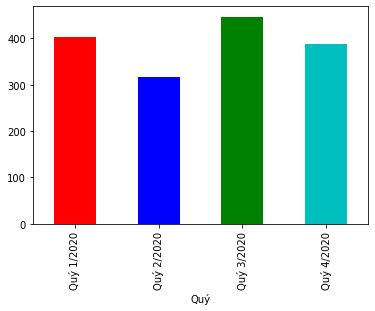

In [12]:
sale.groupby('Quý')['CustomerID'].count().plot(kind='bar',color=['r','b','g','c'])

# TIẾN HÀNH PHÂN LOẠI KHÁCH HÀNG

In [60]:
data=sale[['CustomerID','SaleDate','SalePrice']]
data

,CustomerID,SaleDate,SalePrice
1,CTM10164,2020-08-03,3020000.0
2,CTM10246,2020-10-09,18310000.0
3,CTM1028,2020-05-24,12203000.0
4,CTM1028,2020-10-08,13070000.0
5,CTM1028,2020-12-10,10172000.0
...,...,...,...
1552,CTM99751,2020-01-14,15500000.0
1553,CTM99852,2020-10-02,11539000.0
1554,CTM99852,2020-10-31,21200000.0
1555,CTM99985,2020-01-11,4248000.0


In [61]:
now=max(data['SaleDate'])
data['date_interval']=(now-data["SaleDate"]).dt.days
data

d:\python 3.7.7\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CustomerID,SaleDate,SalePrice,date_interval
1,CTM10164,2020-08-03,3020000.0,150
2,CTM10246,2020-10-09,18310000.0,83
3,CTM1028,2020-05-24,12203000.0,221
4,CTM1028,2020-10-08,13070000.0,84
5,CTM1028,2020-12-10,10172000.0,21
...,...,...,...,...
1552,CTM99751,2020-01-14,15500000.0,352
1553,CTM99852,2020-10-02,11539000.0,90
1554,CTM99852,2020-10-31,21200000.0,61
1555,CTM99985,2020-01-11,4248000.0,355


In [62]:
rfm = data.groupby(['CustomerID'], as_index ='CustomerID').agg(
    {'CustomerID': 'count','date_interval': 'min', 'SalePrice': 'sum'})
rfm.columns=['f','r','m']
rfm

,f,r,m
CustomerID,,,
CTM10164,1,150,3020000.0
CTM10246,1,83,18310000.0
CTM1028,4,5,55458000.0
CTM10516,2,98,23182000.0
CTM10573,4,29,88625000.0
...,...,...,...
CTM99547,1,130,12640000.0
CTM9971,2,14,23909000.0
CTM99751,1,352,15500000.0


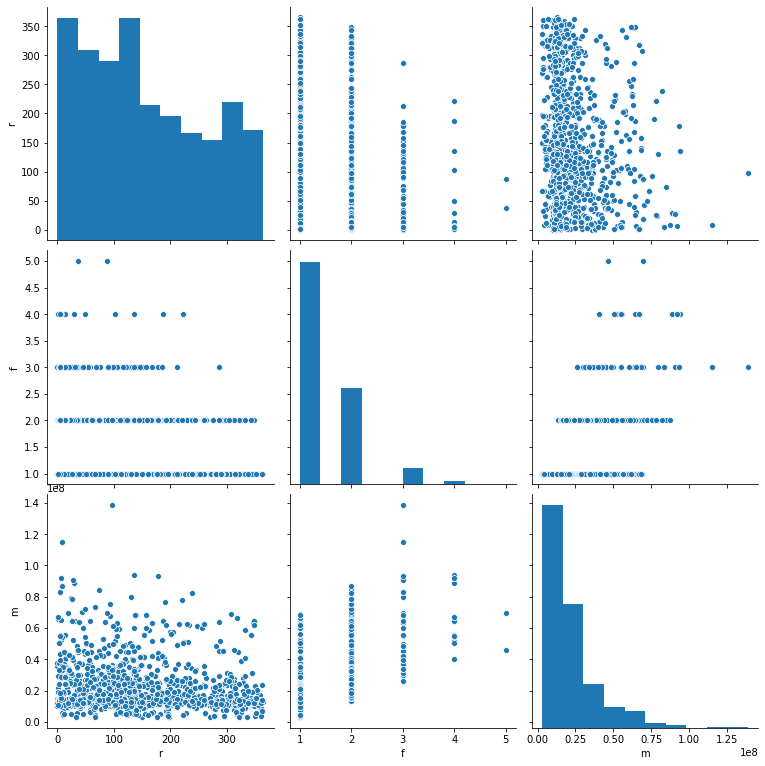

In [63]:
sns.pairplot(rfm,vars=["r", "f","m"],kind='scatter',height=3.5)

In [64]:
#CHUẨN HÓA DỮ LIỆU TRƯỚC KHI TRAIN

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm)
X = scaler.transform(rfm)
X

array([[-0.64362545, -0.06543583, -1.19367315],
       [-0.64362545, -0.70002929, -0.25303882],
       [ 3.97277107, -1.43880973,  2.03229042],
       ...,
       [-0.64362545,  1.84781609, -0.42590883],
       [ 0.89517339, -0.90840326,  0.63462716],
       [ 0.89517339, -1.43880973, -0.2328604 ]])

<AxesSubplot:>

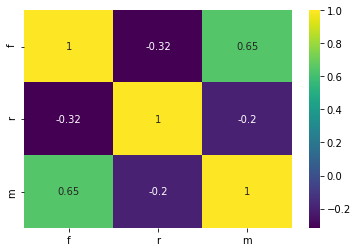

In [65]:
sns.heatmap(rfm.corr(), annot=True, cmap='viridis')

In [66]:
from sklearn.cluster import KMeans

kmeans = []
wcss = []

for i in np.arange(1, 8, 1):
    km_i = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km_i.fit(X)
    wcss.append(km_i.inertia_)
    kmeans.append(km_i)

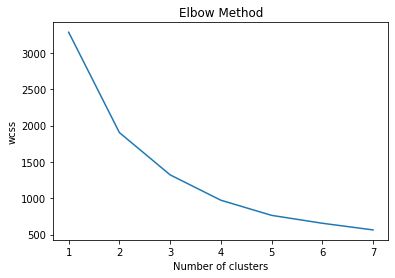

In [67]:
plt.plot(np.arange(1, 8),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

THEO ELBOW, CHỌN K=3

In [68]:
rfm['cluster'] = kmeans[3].predict(X)
rfm

,f,r,m,cluster
CustomerID,,,,
CTM10164,1,150,3020000.0,0
CTM10246,1,83,18310000.0,0
CTM1028,4,5,55458000.0,3
CTM10516,2,98,23182000.0,1
CTM10573,4,29,88625000.0,3
...,...,...,...,...
CTM99547,1,130,12640000.0,0
CTM9971,2,14,23909000.0,1
CTM99751,1,352,15500000.0,2


In [69]:
rfm['Quý']=sale['Quý']

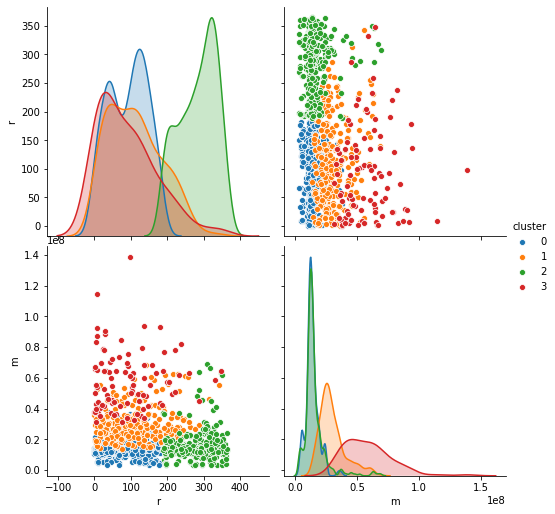

In [70]:
sns.pairplot(rfm,hue='cluster',vars=["r","m"],kind='scatter',height=3.5)

<AxesSubplot:xlabel='cluster'>

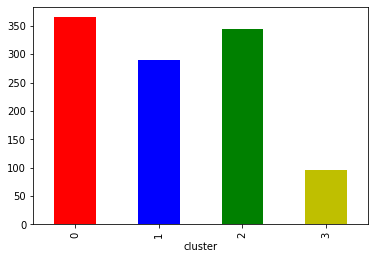

In [71]:
rfm.groupby('cluster')['cluster'].count().plot(kind='bar',color=['r','b','g','y'])

In [72]:
rfm.groupby('cluster').describe()

f                                                   r  \
         count      mean       std  min  25%  50%  75%  max  count   
cluster                                                              
0        365.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  365.0   
1        290.0  1.927586  0.296924  1.0  2.0  2.0  2.0  3.0  290.0   
2        344.0  1.043605  0.204511  1.0  1.0  1.0  1.0  2.0  344.0   
3         96.0  2.812500  0.715431  2.0  2.0  3.0  3.0  5.0   96.0   

                     ...                     m                              \
               mean  ...     75%    max  count          mean           std   
cluster              ...                                                     
0         91.487671  ...  134.00  186.0  365.0  1.367884e+07  5.201495e+06   
1        110.413793  ...  161.25  343.0  290.0  2.990041e+07  1.065570e+07   
2        284.142442  ...  326.00  365.0  344.0  1.544047e+07  9.139159e+06   
3         90.177083  ...  135.00  348.0   96.0  5.810338e+07  1.916789e+07   

                                                                      
                min         25%         50%         75%          max  
cluster                                                               
0         3020000.0  11090000.0  12800000.0  15700000.0   37858000.0  
1        13406000.0  23068000.0  27165500.0  34159500.0   68103000.0  
2         3050000.0  11377500.0  13230000.0  16592500.0   68977000.0  
3        30925000.0  43352250.0  55209500.0  67773750.0  138799000.0  

[4 rows x 24 columns]

<AxesSubplot:>

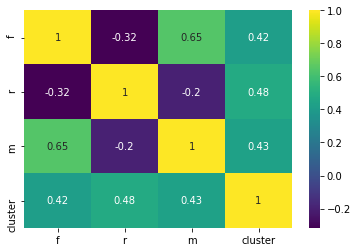

In [25]:
sns.heatmap(rfm.corr(), annot=True, cmap='viridis')

# Có 4 nhóm đối tượng, dựa trên mô tả:
Nhóm 2- Lost Customer (Chỉ mua một lần, giá trị mang lại không cao, từ ngày mua gần nhất đã rất lâu)

Nhóm 0- New Customer (Chỉ mua một lần, Giá trị mang lại không cao, Mới mua gần đây)

Nhóm 1- Potential Customer (Mua nhiều hơn hai lần, giá trị mang lại lớn)

Nhóm 3- High Customer (Mua nhiều hơn ba lần, giá trị mang lại rất lớn)

In [26]:
rfm['Segment']='Lost Customers'
rfm.loc[(rfm.cluster==0),'Segment']='New Customers'
rfm.loc[(rfm.cluster==3),'Segment']='High Customers'
rfm.loc[(rfm.cluster==1),'Segment']='Potential Customers'

# TIẾP THEO CẦN TÌM HIỂU DEMOGRAPHIC CỦA NHÓM KHÁCH HÀNG NÀY

In [73]:
customer_profile = rfm.merge(profile,right_on='KH_ID',left_on='CustomerID',how='left')
customer_profile.shape

(1096, 25)

In [47]:
customer_profile.to_excel('customer_profile.xlsx')
sale.to_excel('sale_profile.xlsx')

In [30]:
customer_profile.head(2)

,f,r,m,cluster,Segment,KH_ID,GioiTinh,QueQuan,NamHocThu,DoTuoi,...,MucDoHaiLong,YeuToThuongHieuSP,YeuToCauHinh,YeuToTocDoXuLy,YeuToGia,YeuToThietKe,YeuToUyTinNhaBanle,YeuToBaoMat,YeuToBaoHanh,YeuToKhuyenMai
0,1,150,3020000.0,0,New Customers,CTM10164,Nam,Quảng Trị,Năm 2,20,...,5,3,3,3,3,3,3,3,3,3
1,1,83,18310000.0,0,New Customers,CTM10246,Nam,Đà Nẵng,Năm 4,22,...,4,4,5,5,4,3,4,1,5,5


In [28]:
shop=pd.DataFrame(sale.groupby(by=['Shop','CustomerID'])['CustomerID'].count())
shop

CustomerID
Shop          CustomerID            
Chợ Lớn       CTM11013             1
              CTM13508             1
              CTM27254             1
              CTM27929             1
              CTM44386             1
...                              ...
Điện máy xanh CTM97740             1
              CTM98114             2
              CTM98262             1
              CTM98808             1
              CTM99985             1

[1510 rows x 1 columns]

d:\python 3.7.7\lib\site-packages\pandas\plotting\_matplotlib\core.py:227: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"


<AxesSubplot:xlabel='r', ylabel='m'>

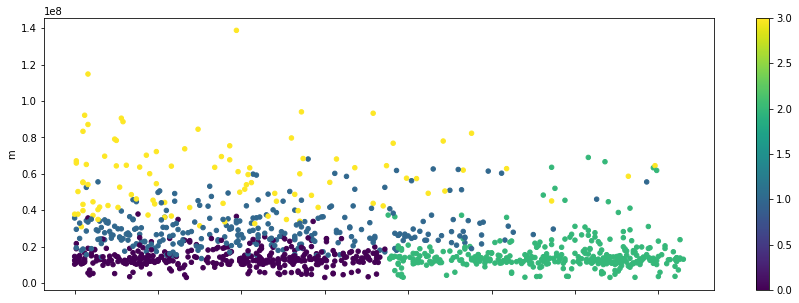

In [29]:
rfm.plot(x='r',y='m',kind='scatter',color=rfm.cluster,figsize=(15,5),colormap='viridis')

In [141]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
cols=customer_profile.columns
copy=customer_profile.copy()
for i in range(6,9):
    copy[cols[i]]=encoder.fit_transform(np.array(copy[cols[i]]).reshape(-1,1))
    
copy

,f,r,m,cluster,Segment,KH_ID,GioiTinh,QueQuan,NamHocThu,DoTuoi,...,MucDoHaiLong,YeuToThuongHieuSP,YeuToCauHinh,YeuToTocDoXuLy,YeuToGia,YeuToThietKe,YeuToUyTinNhaBanle,YeuToBaoMat,YeuToBaoHanh,YeuToKhuyenMai
0,1,150,3020000.0,0,New Customers,CTM10164,0.0,12.0,1.0,20,...,5,3,3,3,3,3,3,3,3,3
1,1,83,18310000.0,0,New Customers,CTM10246,0.0,15.0,3.0,22,...,4,4,5,5,4,3,4,1,5,5
2,4,5,55458000.0,3,High Customers,CTM1028,1.0,7.0,2.0,21,...,4,4,3,4,4,3,4,2,4,4
3,2,98,23182000.0,1,Potential Customers,CTM10516,0.0,1.0,1.0,20,...,4,3,4,4,3,2,3,3,4,2
4,4,29,88625000.0,3,High Customers,CTM10573,0.0,14.0,3.0,22,...,3,3,4,3,4,1,4,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,1,130,12640000.0,0,New Customers,CTM99547,0.0,12.0,0.0,19,...,4,2,5,5,4,2,2,1,3,4
1092,2,14,23909000.0,1,Potential Customers,CTM9971,1.0,4.0,2.0,21,...,4,3,5,5,4,4,5,3,4,4
1093,1,352,15500000.0,2,Lost Customers,CTM99751,1.0,0.0,0.0,19,...,4,4,4,4,4,4,4,4,4,4
1094,2,61,32739000.0,1,Potential Customers,CTM99852,1.0,0.0,3.0,22,...,4,3,4,4,3,3,3,3,3,3


In [146]:
descrip= copy[['Segment','GioiTinh','QueQuan','NamHocThu','DoTuoi']]
descrip.groupby('Segment').median()

,GioiTinh,QueQuan,NamHocThu,DoTuoi
Segment,,,,
High Customers,0.0,4.0,2.0,21
Lost Customers,1.0,5.0,2.0,21
New Customers,1.0,9.0,2.0,21
Potential Customers,1.0,7.0,2.0,21


In [132]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
encoder.fit_transform(np.array(copy['GioiTinh']).reshape(-1,1))

array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [27]:
file_merge = profile.merge(sale,right_on='CustomerID',left_on='KH_ID',how='left')

In [28]:
file_merge.to_excel('File Tổng Hợp.xlsx')

In [29]:
file_merge.shape

(1562, 38)

In [12]:
sale['SalePrice'].mean()

15869684.481648423